In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import os
sys.path.append(os.path.abspath('../'))

In [2]:
from ortc.utils import *
from ortc.glop_v2 import glop_v2

Generated tree edges: [(3, 19), (5, 20), (7, 4), (4, 6), (6, 16), (10, 1), (12, 1), (13, 11), (11, 9), (14, 18), (16, 18), (19, 18), (18, 2), (2, 8), (8, 15), (15, 1), (1, 9), (9, 17), (17, 20)]


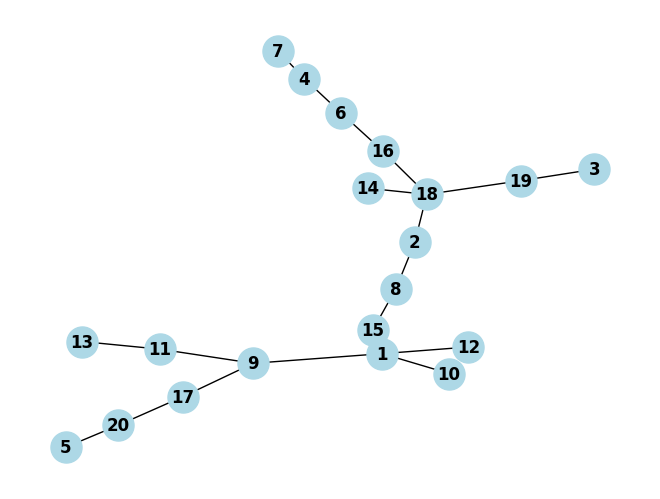

In [3]:
def generate_random_tree(n):
    if n <= 1:
        raise ValueError("The number of nodes must be greater than 1.")
    
    # Step 1: Generate a random Prufer sequence of length n-2
    prufer_sequence = [random.randint(1, n) for _ in range(n - 2)]
    
    # Step 2: Calculate the degree of each node
    node_degree = [1] * n  # Initialize all nodes with degree 1 (leaf)
    for node in prufer_sequence:
        node_degree[node - 1] += 1  
    
    # Step 3: Build the tree using the Prufer sequence
    edges = []
    for node in prufer_sequence:
        # Find the smallest leaf node (degree 1)
        for i in range(n):
            if node_degree[i] == 1:
                edges.append((i + 1, node))
                node_degree[i] -= 1  
                node_degree[node - 1] -= 1  
                break
    
    # Connect the last two remaining leaf nodes
    remaining_nodes = [i + 1 for i in range(n) if node_degree[i] == 1]
    edges.append((remaining_nodes[0], remaining_nodes[1]))
    
    return edges

def plot_tree(edges):
    # Create a graph from the edges and plot it
    G = nx.Graph()
    G.add_edges_from(edges)
    
    pos = nx.spring_layout(G)  # Position nodes using spring layout
    nx.draw(G, pos, with_labels=True, node_color="lightblue", font_weight='bold', node_size=500)
    plt.show()

# Example usage:
n = 20  # Number of nodes in the tree
tree_edges = generate_random_tree(n)
print("Generated tree edges:", tree_edges)

# Visualize the generated tree
plot_tree(tree_edges)


In [4]:
tree_edges

[(1, 19),
 (4, 10),
 (6, 9),
 (9, 19),
 (10, 7),
 (12, 14),
 (13, 19),
 (15, 14),
 (16, 2),
 (2, 8),
 (8, 3),
 (3, 17),
 (17, 11),
 (11, 5),
 (5, 20),
 (18, 7),
 (7, 20),
 (19, 14),
 (14, 20)]

In [1]:
def generate_random_tree(n):
    if n <= 1:
        raise ValueError("The number of nodes must be greater than 1.")
    
    # Step 1: Generate a random Prufer sequence of length n-2
    prufer_sequence = [random.randint(1, n) for _ in range(n - 2)]
    
    # Step 2: Calculate the degree of each node
    node_degree = [1] * n  # Initialize all nodes with degree 1 (leaf)
    for node in prufer_sequence:
        node_degree[node - 1] += 1  
    
    # Step 3: Build the tree using the Prufer sequence
    edges = []
    for node in prufer_sequence:
        # Find the smallest leaf node (degree 1)
        for i in range(n):
            if node_degree[i] == 1:
                edges.append((i + 1, node))
                node_degree[i] -= 1  
                node_degree[node - 1] -= 1  
                break
    
    # Connect the last two remaining leaf nodes
    remaining_nodes = [i + 1 for i in range(n) if node_degree[i] == 1]
    edges.append((remaining_nodes[0], remaining_nodes[1]))
    
    # Create a graph from the edges and plot it
    G = nx.Graph()
    G.add_edges_from(edges)

    return nx.to_numpy_array(G, nodelist=list(range(1, n+1)))

In [5]:
generate_random_tree(10)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.]])